'''
Objective of the Study: To find out the weak areas where the business manager can work to make more profit and deriving the business problems by exploratory data analysis 
Type of Data: Sample Superstore Dataset
Model Used: Exploratory Data Analysis (EDS)
Source of Data: https://bit.ly/3i4rbWl
'''

Steps Involved 
1) Defining the problem
2) Checking versions of libraries
3) Importing libraries into this notebook
4) Importing Dataset 
5) Cleaning of data / Pre-processing of data
6) Summarizing data set to extract actionable insights
7) Visualisation of Data
8) Conclusion

In [2]:
import numpy
print( 'numpy: {}'.format(numpy.__version__))
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
import pandas 
print('pandas: {}'.format(pandas.__version__))
import sklearn
print('sklearn: {}'.format(sklearn.__version__))
import seaborn 
print('seaborn: {}'.format(seaborn.__version__))

numpy: 1.23.5
matplotlib: 3.7.0
pandas: 1.5.3
sklearn: 1.2.1
seaborn: 0.12.2


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import datasets
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import os

print("Libraries imported")

Libraries imported


In [5]:
df_orders = pd.read_csv(r"C:\Users\anime\Desktop\Superstore analysis\SampleSuperstore.csv")

In [6]:
df_orders.shape

(9994, 13)

In [7]:
df_orders.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [8]:
df_orders.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [9]:
df_orders.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [10]:
df_orders["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [11]:
df_orders["Sub-Category"].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [13]:
df_orders["Segment"].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [16]:
df_orders=df_orders.drop(columns=["Postal Code"], axis=1)

In [17]:
df_orders.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [18]:
df_orders['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [19]:
df_orders['Category'].value_counts().sum()

9994

In [21]:
df_orders['Sub-Category'].nunique()

17

In [22]:
df_orders['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [23]:
df_orders["Region"].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [24]:
df_orders["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [25]:
df_orders["State"].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [26]:
df_orders["City"].unique()

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
       'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
       'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
       'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
       'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
       'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield',
       'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina',
       'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville',
       'San Diego', 'Brentwood', 'Cha

In [27]:
df_orders.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [28]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.1+ KB


In [29]:
df_orders.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [30]:
df_orders.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [31]:
df_orders.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [32]:
for col in df_orders:
    print(df_orders[col].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
['United States']
['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield' 'Akron'
 'Denver' 'Dallas' 'Whittier' 'Saginaw' 'Medina' 'Dublin' 'Detroit'
 'Tampa' 'Santa Clara' 'Lakeville' 'San Diego' 'Brentwood' 'Chapel Hill'
 'Morristown' 'Cincinnati' 'Inglewood' 

In [33]:
df_orders.duplicated().sum()

50

<Axes: >

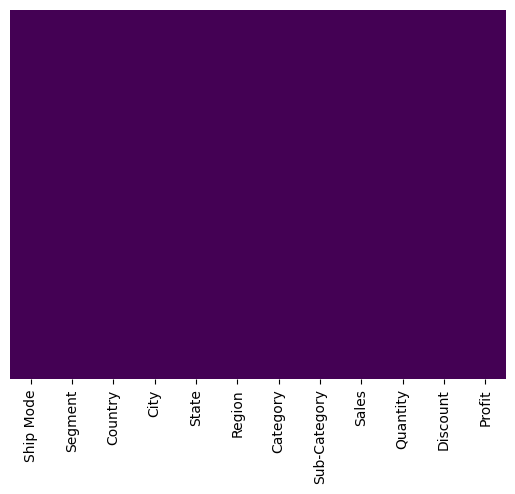

In [34]:
sns.heatmap(df_orders.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [35]:
df_orders.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [36]:
df_orders.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


In [37]:
df_orders.cov()

,Sales,Quantity,Discount,Profit
Sales,388434.455308,278.459923,-3.627228,69944.096586
Quantity,278.459923,4.951113,0.003961,34.534769
Discount,-3.627228,0.003961,0.042622,-10.615173
Profit,69944.096586,34.534769,-10.615173,54877.798055


1) If cov(xi, xj) = 0 then variables are uncorrelated
2) If cov(xi, xj) > 0 then variables positively correlated
3) If cov(xi, xj) < 0 then variables negatively correlated

In [38]:
df_orders.iloc[0]

Ship Mode        Second Class
Segment              Consumer
Country         United States
City                Henderson
State                Kentucky
Region                  South
Category            Furniture
Sub-Category        Bookcases
Sales                  261.96
Quantity                    2
Discount                  0.0
Profit                41.9136
Name: 0, dtype: object

In [39]:
df_orders.value_counts()

Ship Mode       Segment      Country        City           State         Region   Category         Sub-Category  Sales    Quantity  Discount  Profit   
Standard Class  Consumer     United States  Los Angeles    California    West     Office Supplies  Paper         19.440   3         0.0        9.3312      4
                Corporate    United States  Houston        Texas         Central  Office Supplies  Paper         15.552   3         0.2        5.4432      3
                Consumer     United States  San Francisco  California    West     Office Supplies  Paper         25.920   4         0.0        12.4416     2
                                            Detroit        Michigan      Central  Furniture        Chairs        389.970  3         0.0        35.0973     2
                                            Philadelphia   Pennsylvania  East     Office Supplies  Paper         20.736   4         0.2        7.2576      2
                                                               

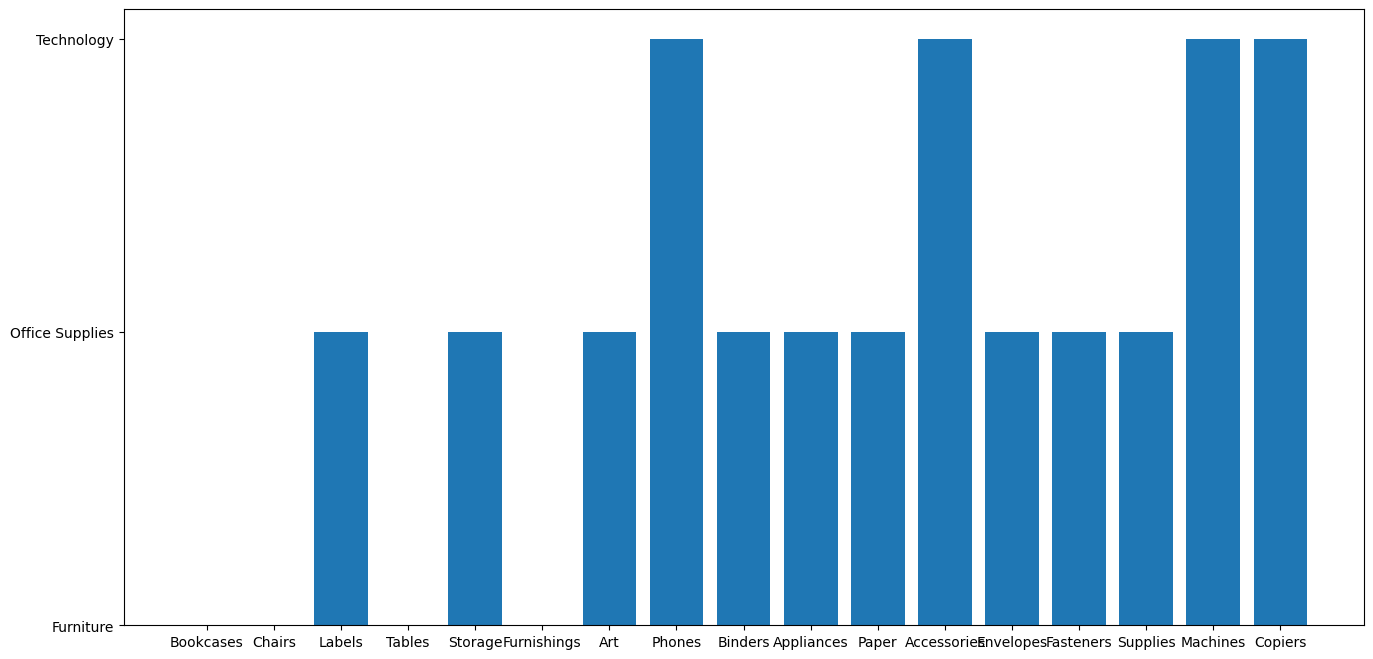

In [42]:
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category', data=df_orders)
plt.show()

1) In furniture category the frequency of individual item is very less
2) In office supplies the frequency of individual item is medium
3) In technology the frequency of individual of individual item is high

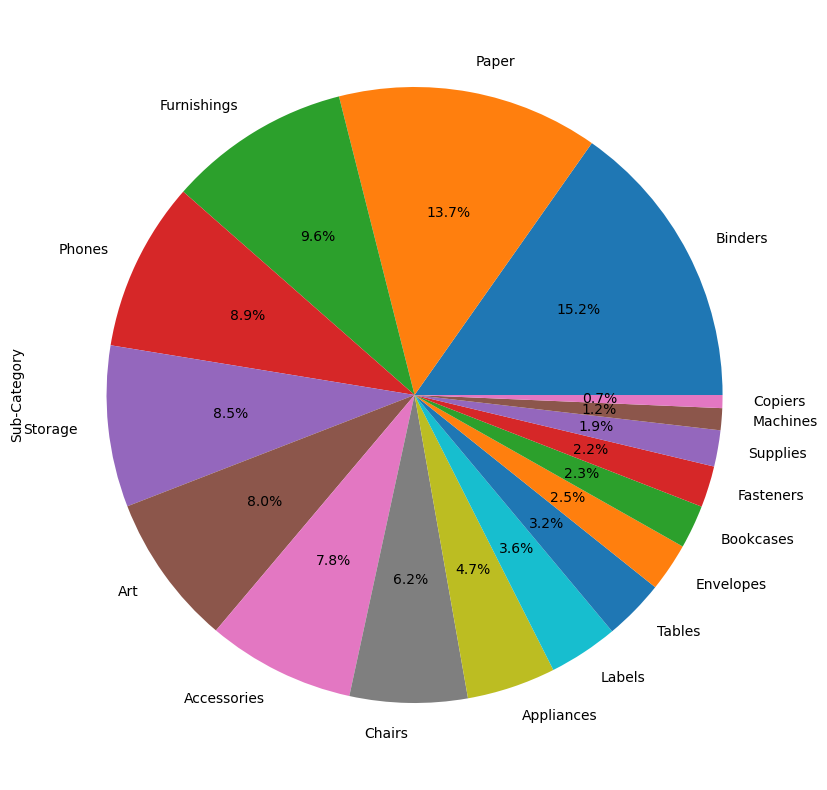

In [43]:
plt.figure(figsize=(12,10))
df_orders['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

The store has wide variety of office supplies espicially in binders and paper department

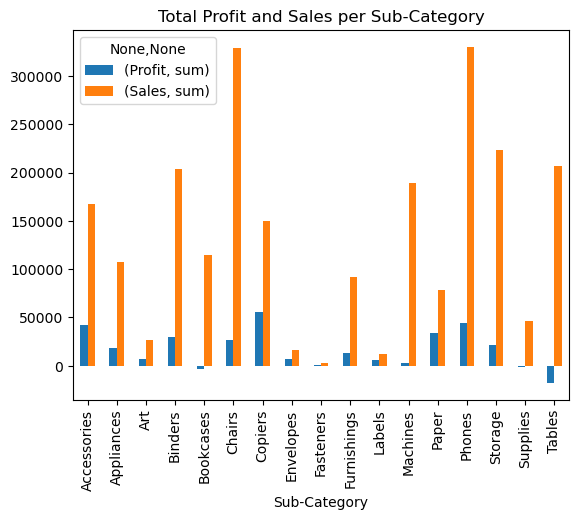

In [45]:
df_orders.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Sub-Category')
plt.rcParams['figure.figsize'] = [10,8]
plt.show()

1) Highest profit is earned in Copiers while selling price for Chairs and Phones is extremely high compared to toher products.
2) Another interesting fact- people dont prefer to buy Tables and Bookcases from superstore. Hence these departments are in losses.

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

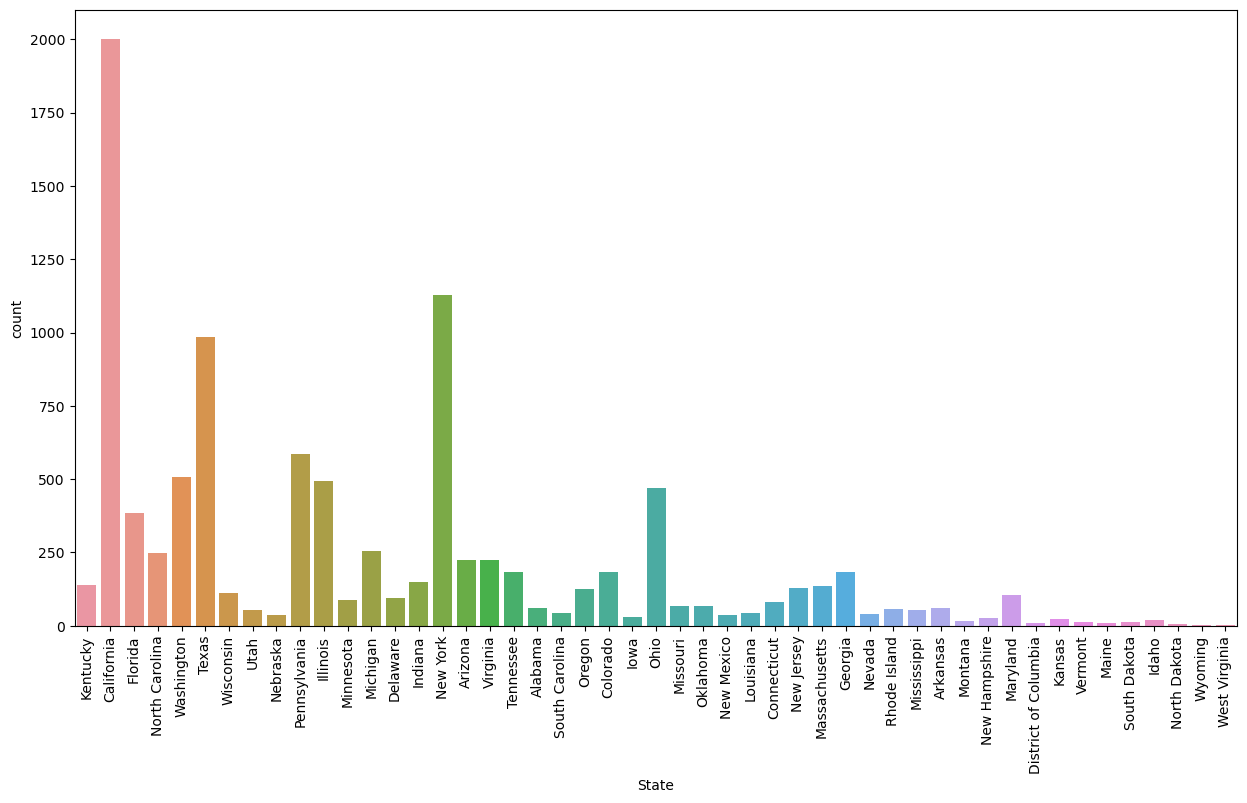

In [46]:
print(df_orders['State'].value_counts())
plt.figure(figsize=(15,8))
sns.countplot(x=df_orders['State'])
plt.xticks(rotation=90)
plt.show()

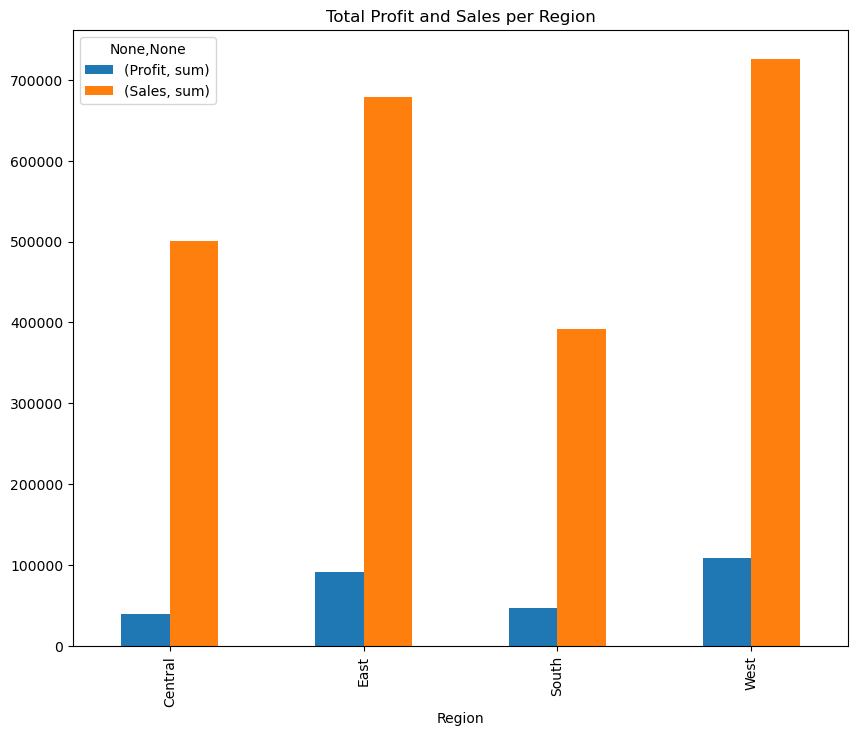

In [48]:
df_orders.groupby('Region')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Region')
plt.rcParams['figure.figsize'] = [10,8]
plt.show()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


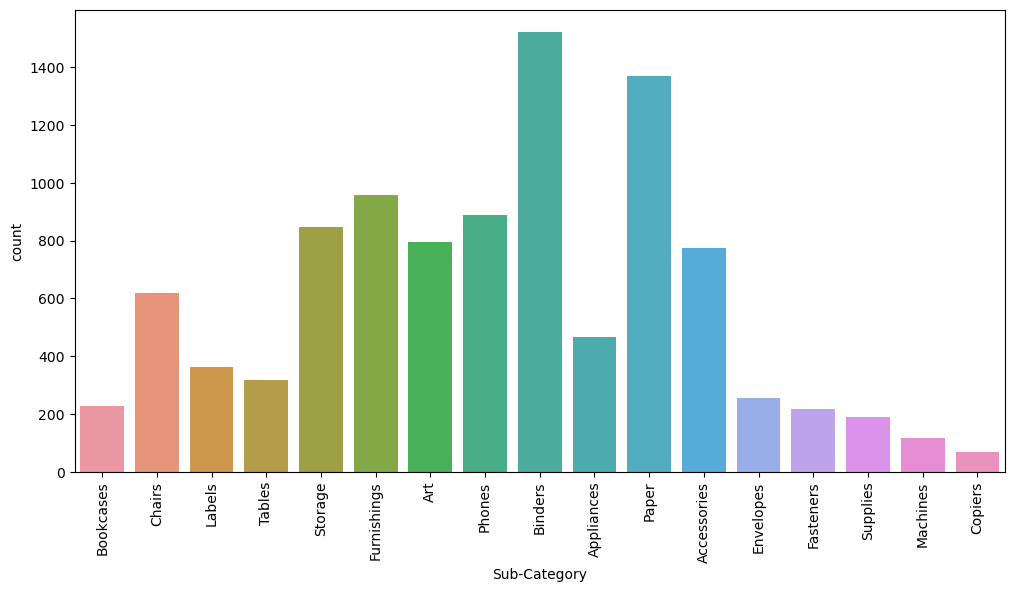

In [49]:
print(df_orders['Sub-Category'].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(x=df_orders['Sub-Category'])
plt.xticks(rotation=90)
plt.show()

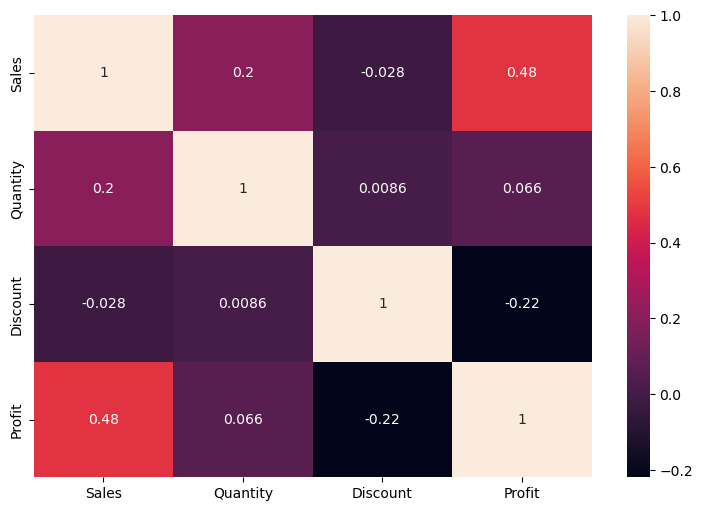

In [51]:
fig,axes = plt.subplots(1,1,figsize=(9,6))
sns.heatmap(df_orders.corr(), annot= True)
plt.show()

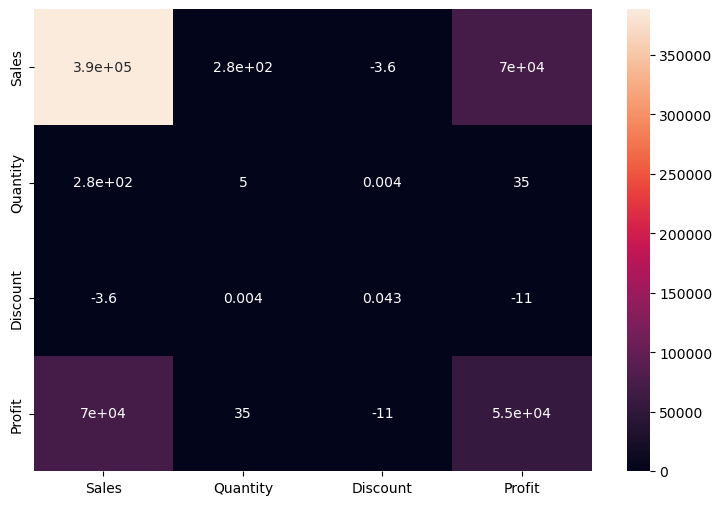

In [52]:
fig,axes = plt.subplots(1,1,figsize=(9,6))
sns.heatmap(df_orders.cov(),annot= True)
plt.show()

<Axes: xlabel='Segment', ylabel='count'>

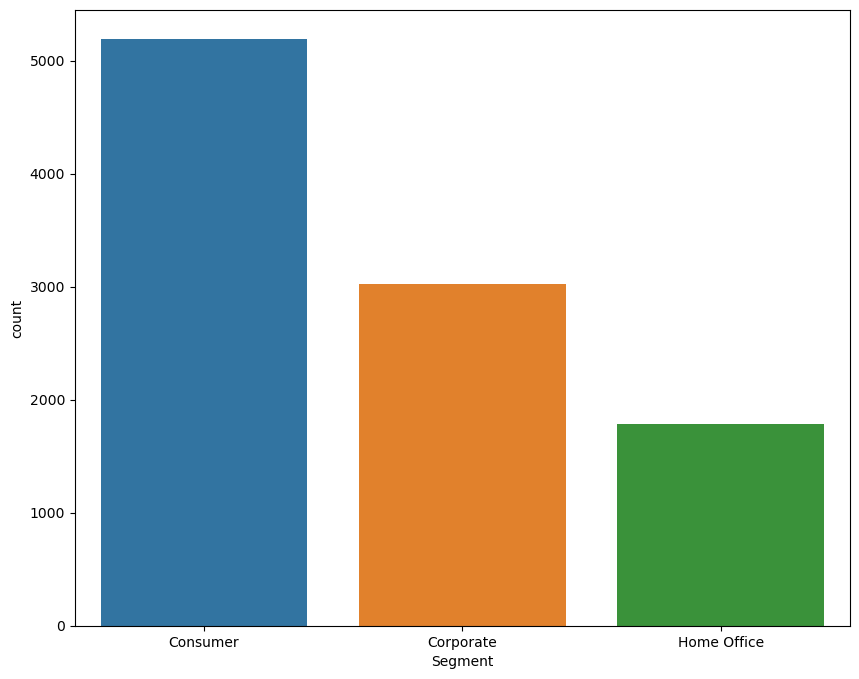

In [54]:
sns.countplot(x=df_orders['Segment'])

<Axes: xlabel='Region', ylabel='count'>

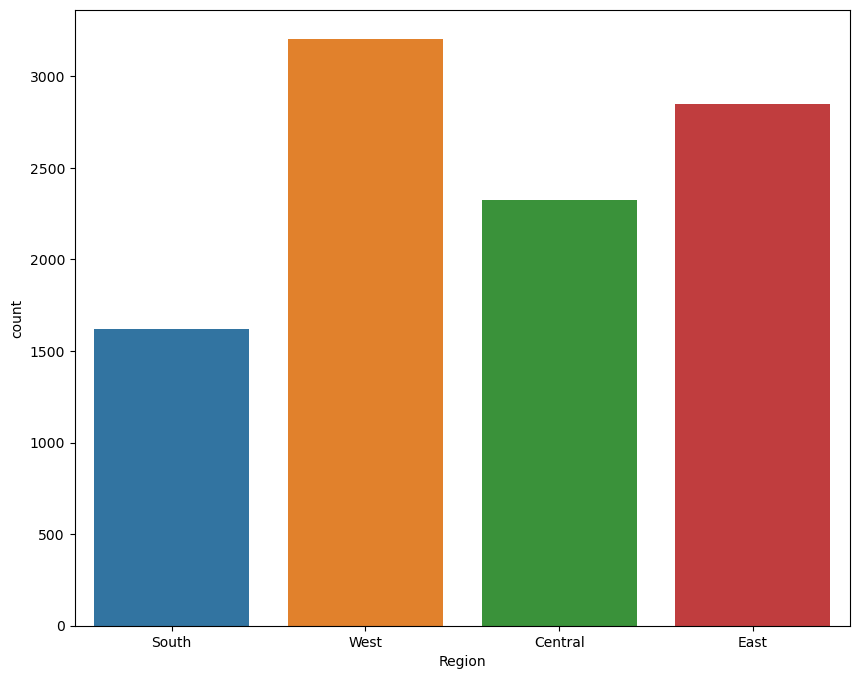

In [55]:
sns.countplot(x=df_orders['Region'])

<Axes: xlabel='Sub-Category', ylabel='Profit'>

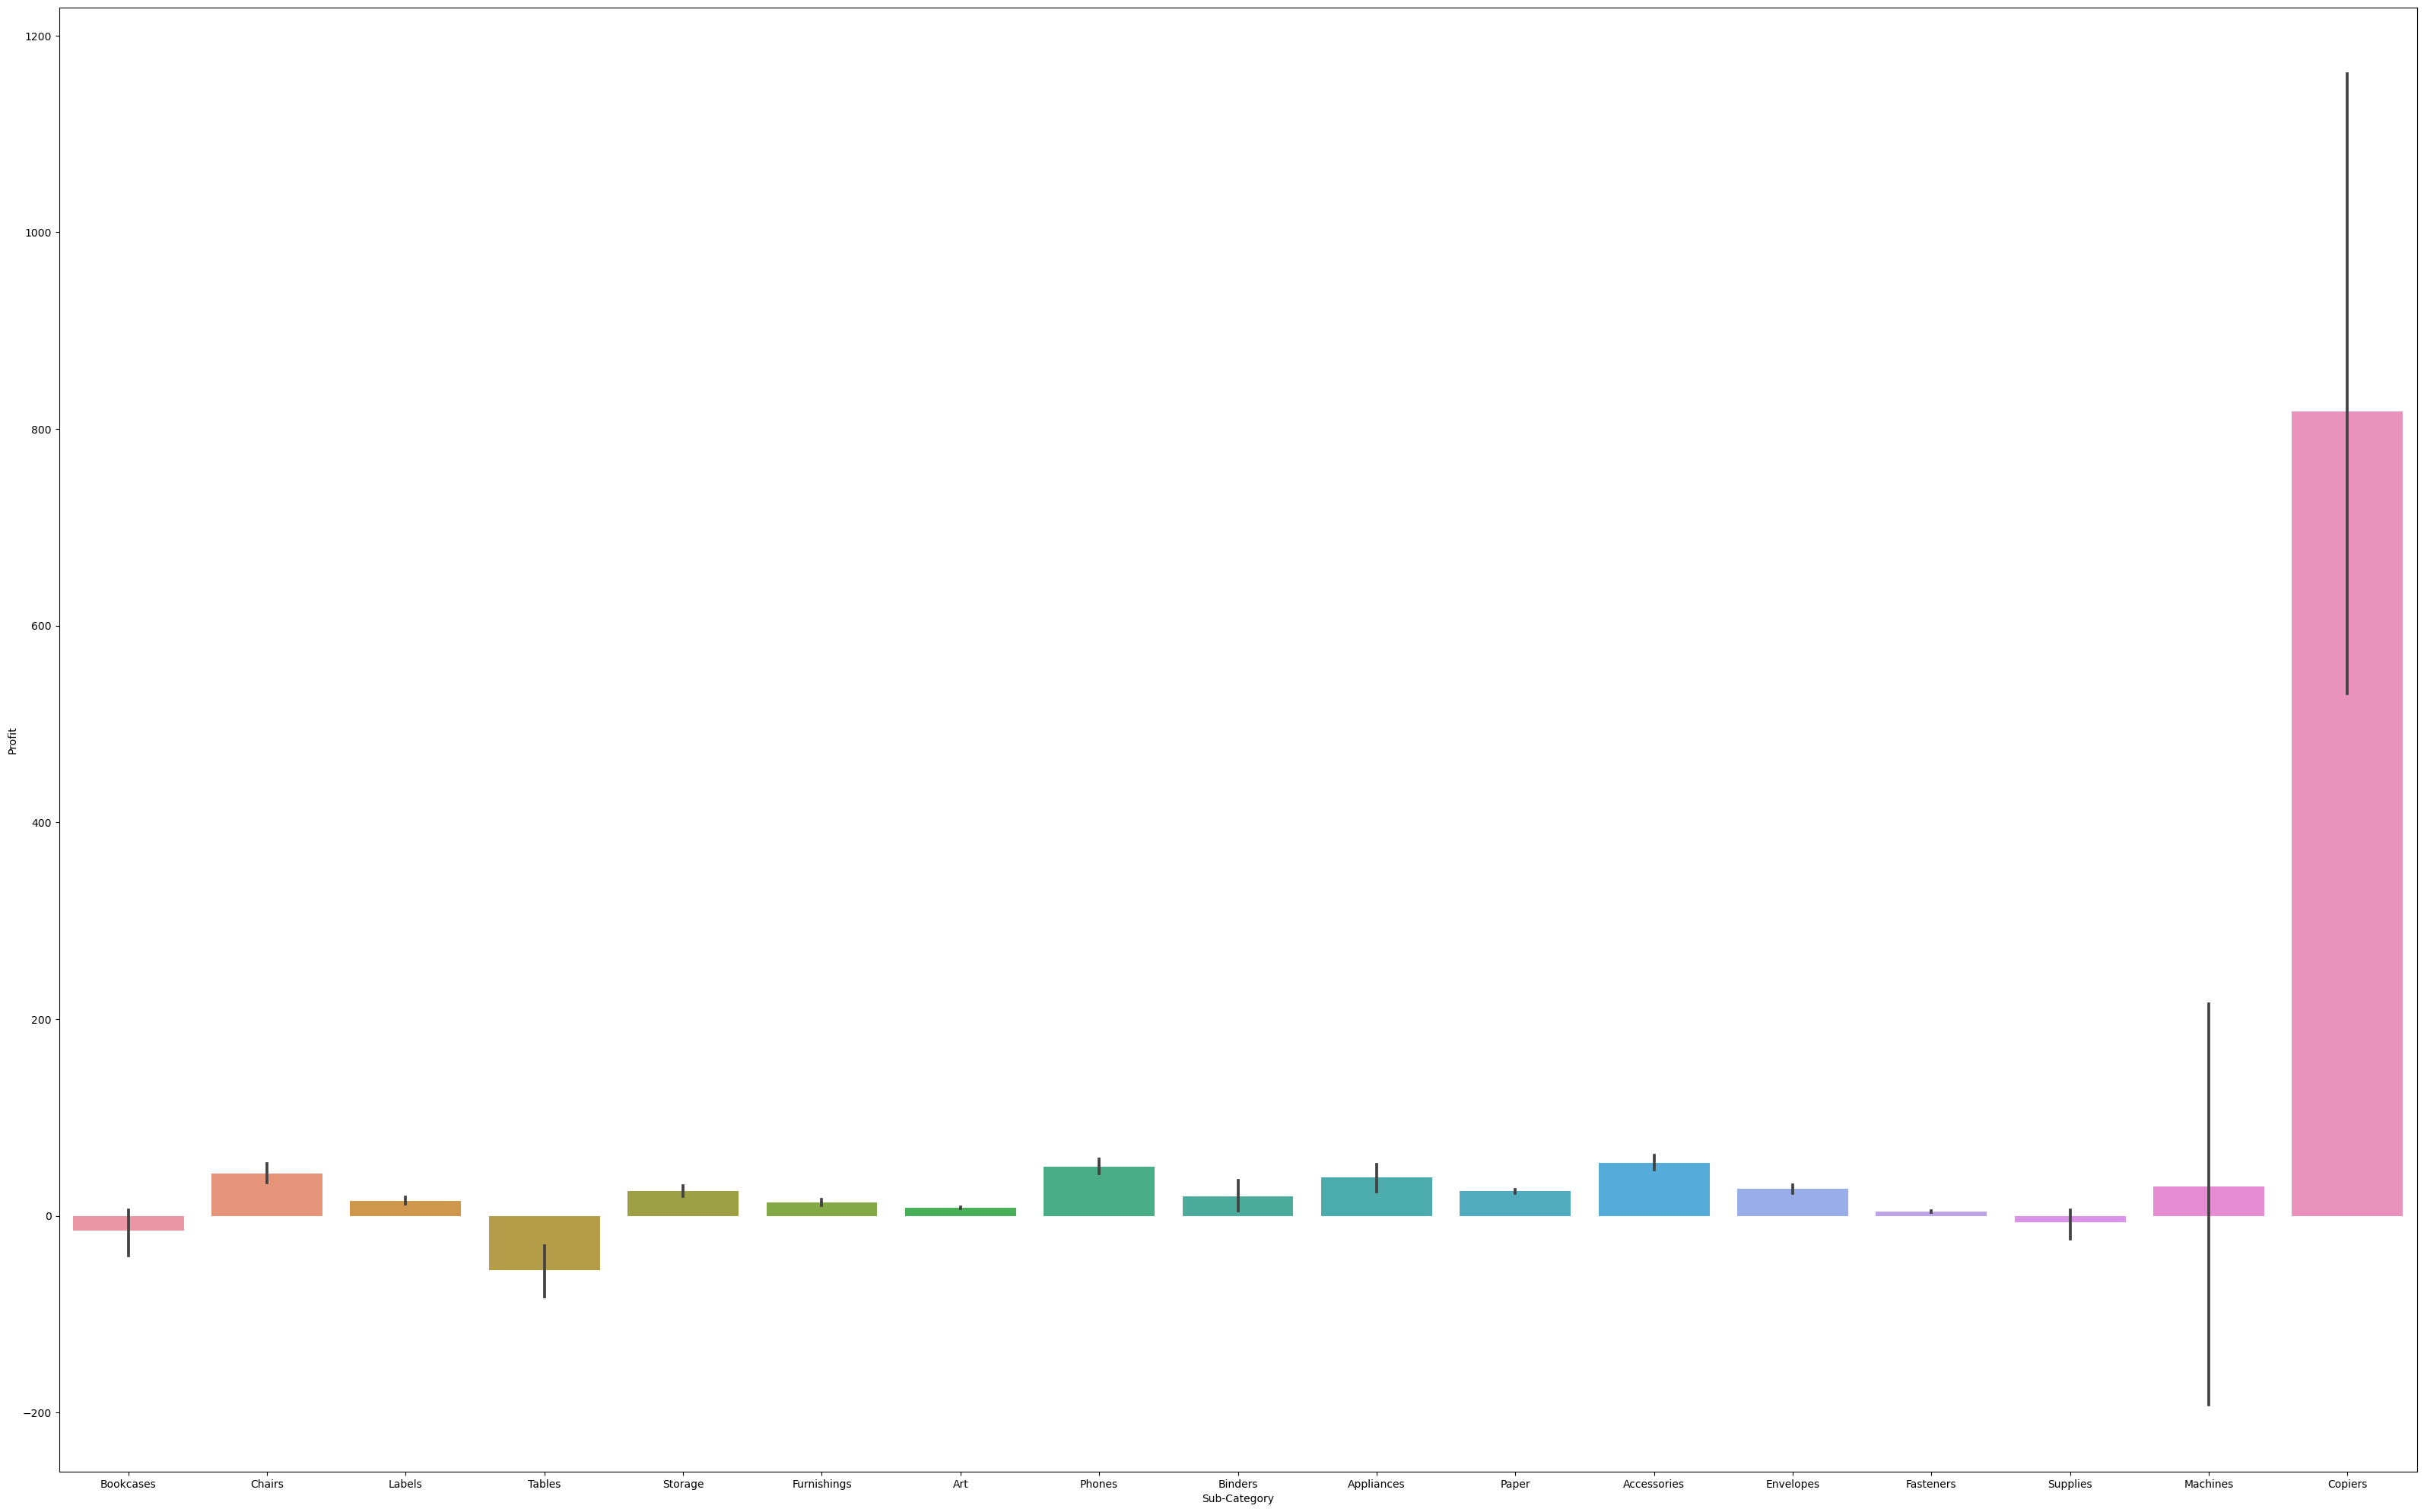

In [56]:
plt.figure(figsize=(40,25))
sns.barplot(x=df_orders['Sub-Category'], y=df_orders['Profit'])


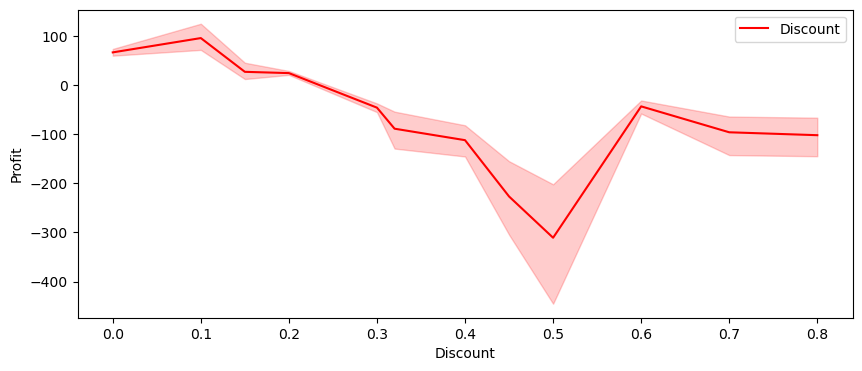

In [62]:
plt.figure(figsize=(10, 4))
sns.lineplot(x='Discount', y='Profit', data=df_orders, color='r', label='Discount')
plt.legend()
plt.show()

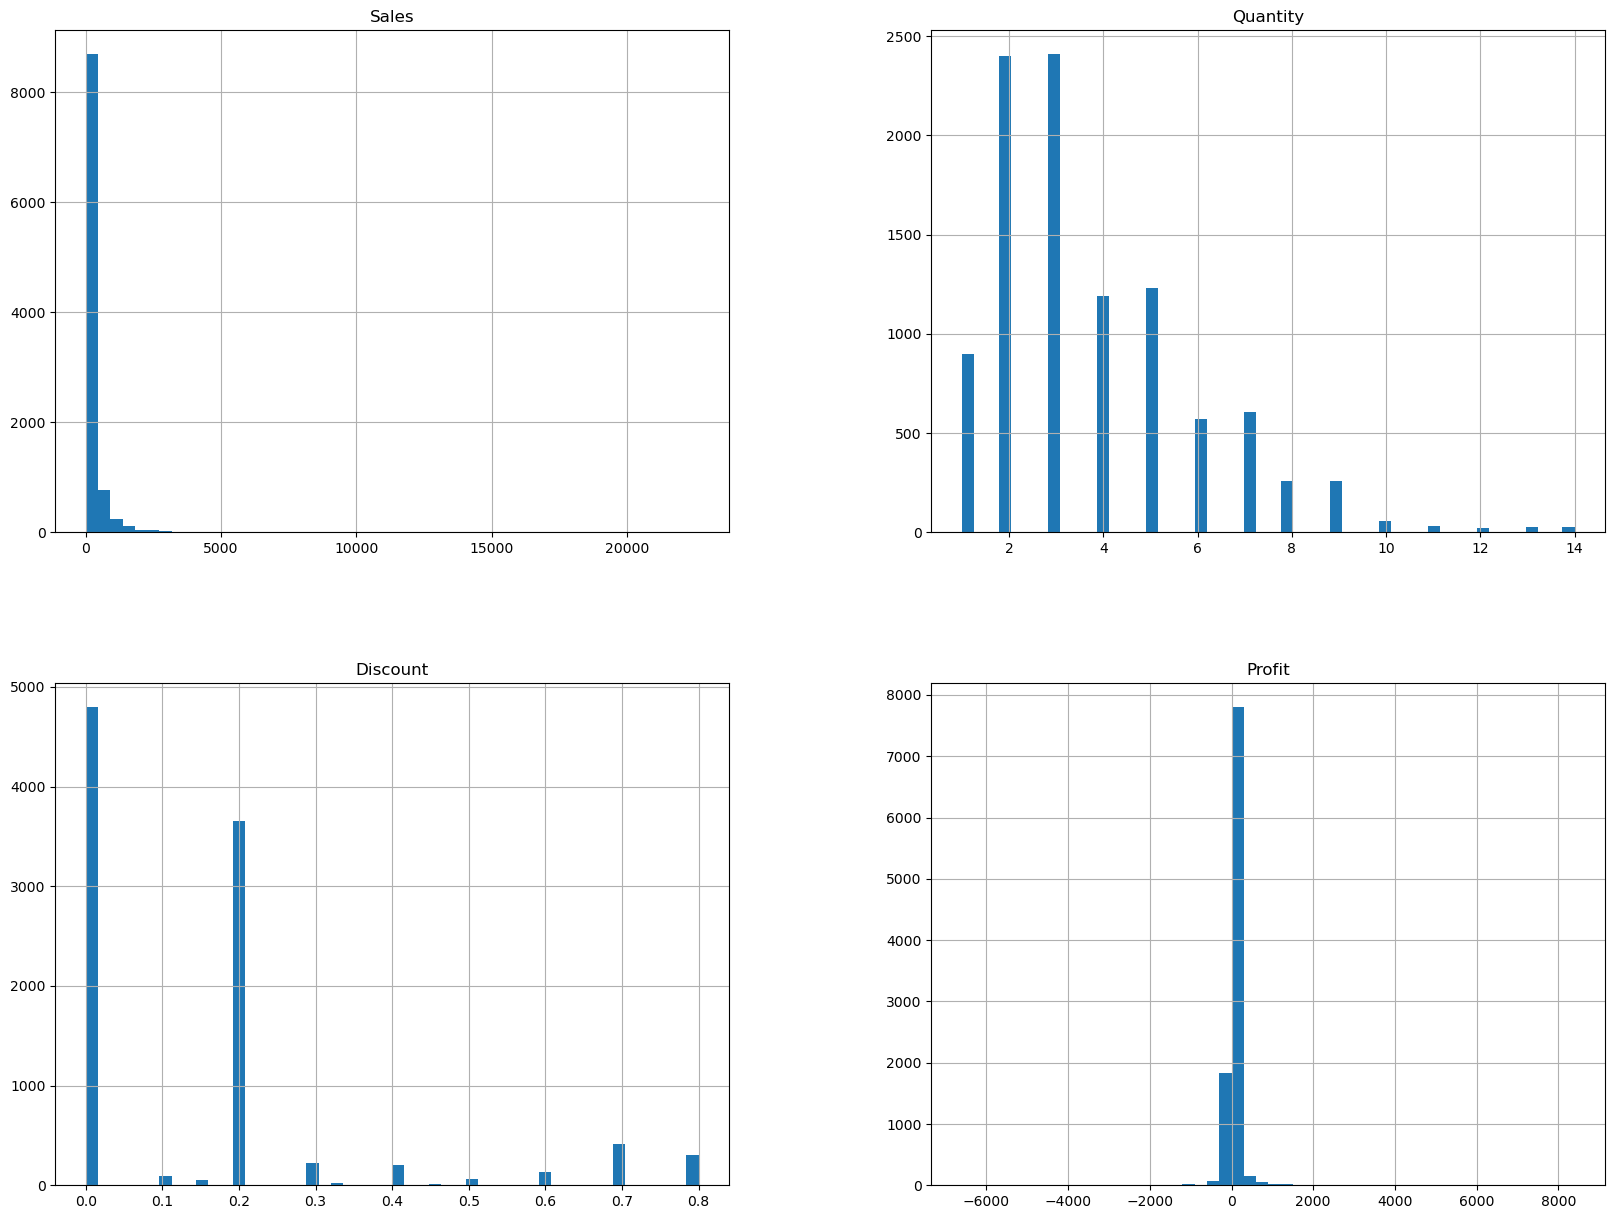

In [65]:
df_orders.hist(bins=50,figsize=(20,15))
plt.show()

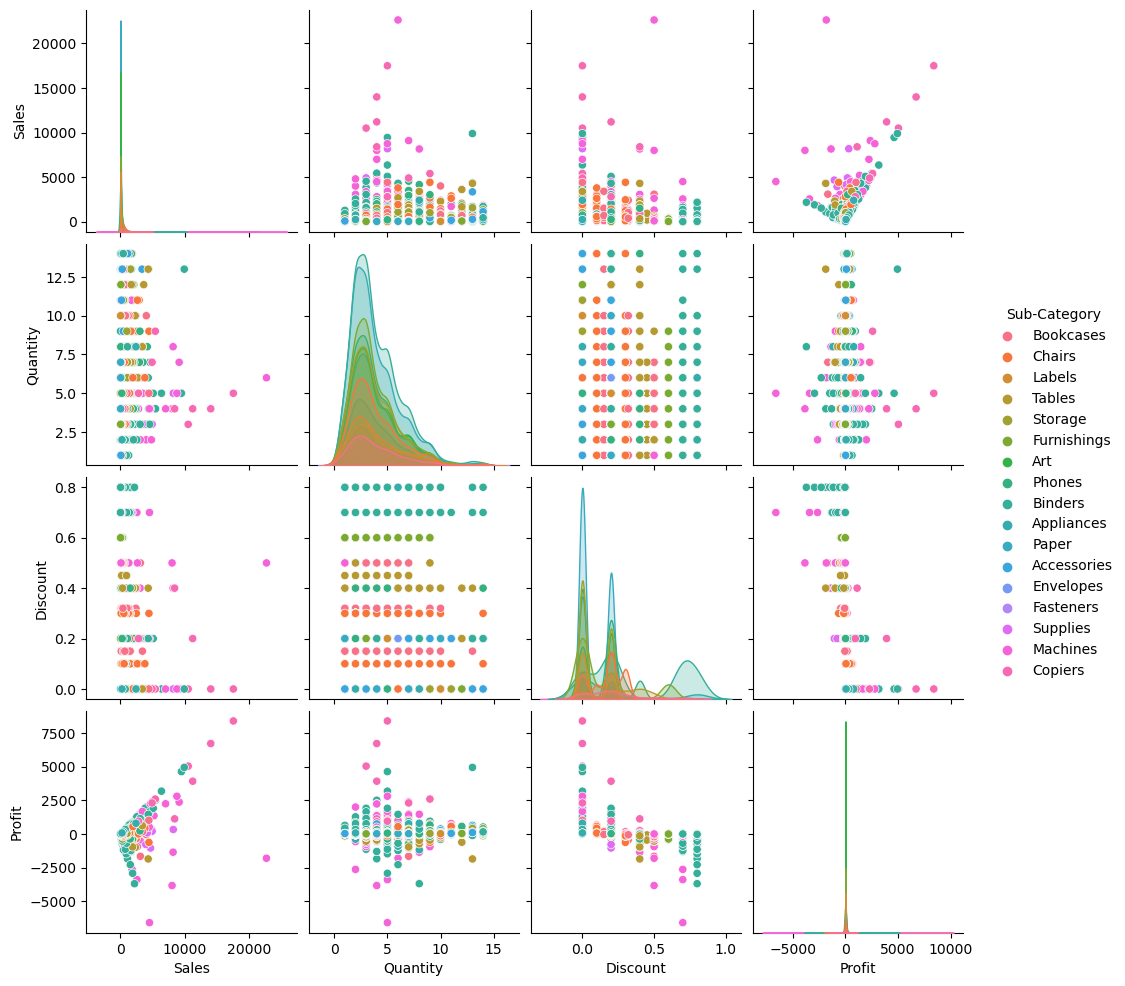

In [71]:
figsize=(15,10)
sns.pairplot(df_orders,hue='Sub-Category')

In [78]:
grouped=pd.DataFrame(df_orders.groupby(['Ship Mode','Segment','Category','Sub-Category','State','Region'])['Quantity','Discount','Sales','Profit'].sum().reset_index())

In [76]:
grouped=pd.DataFrame(df_orders.groupby(['Ship Mode','Segment','Category','Sub-Category','State','Region'])['Quantity','Discount','Sales','Profit'].sum().reset_index())

In [79]:
df_orders.groupby("State").Profit.agg(["sum","mean","min","max","count","median","std","var"])

,sum,mean,min,max,count,median,std,var
State,,,,,,,,
Alabama,5786.8253,94.865989,0.0000,1459.2000,61,16.87500,210.901876,44479.601429
Arizona,-3427.9246,-15.303235,-814.4832,211.4955,224,2.53365,109.266267,11939.117124
Arkansas,4008.6871,66.811452,1.4190,843.1706,60,18.34080,123.249880,15190.532873
California,76381.3871,38.171608,-325.5720,1906.4850,2001,13.30560,97.691593,9543.647400
Colorado,-6527.8579,-35.867351,-3399.9800,247.9960,182,3.12480,276.424024,76410.240842
Connecticut,3511.4918,42.823071,-15.5826,294.6710,82,12.18310,66.138081,4374.245726
Delaware,9977.3748,103.930988,-48.7839,5039.9856,96,19.19700,518.953513,269312.749126
District of Columbia,1059.5893,105.958930,4.4344,648.5624,10,14.52720,213.461353,45565.749398
Florida,-3399.3017,-8.875461,-1811.0784,327.5922,383,2.93400,126.324165,15957.794770


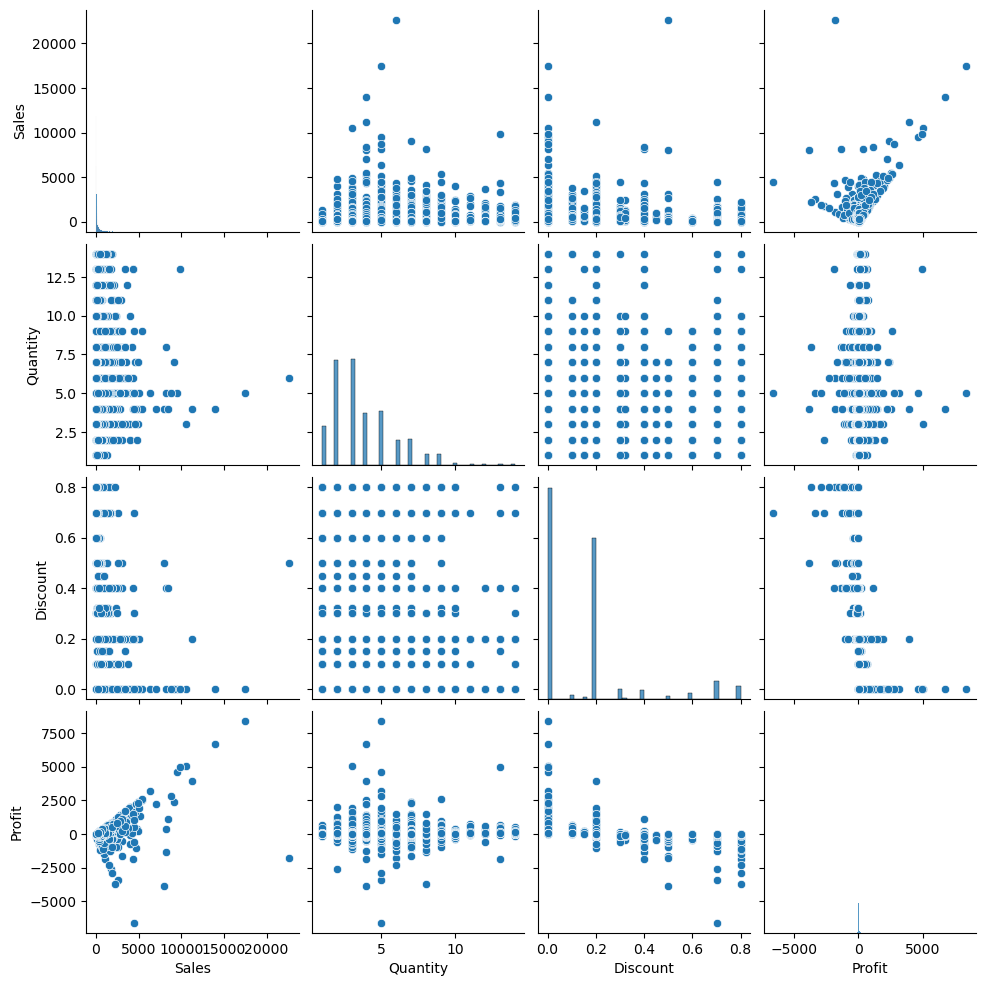

In [81]:
sns.pairplot(df_orders)

<Axes: >

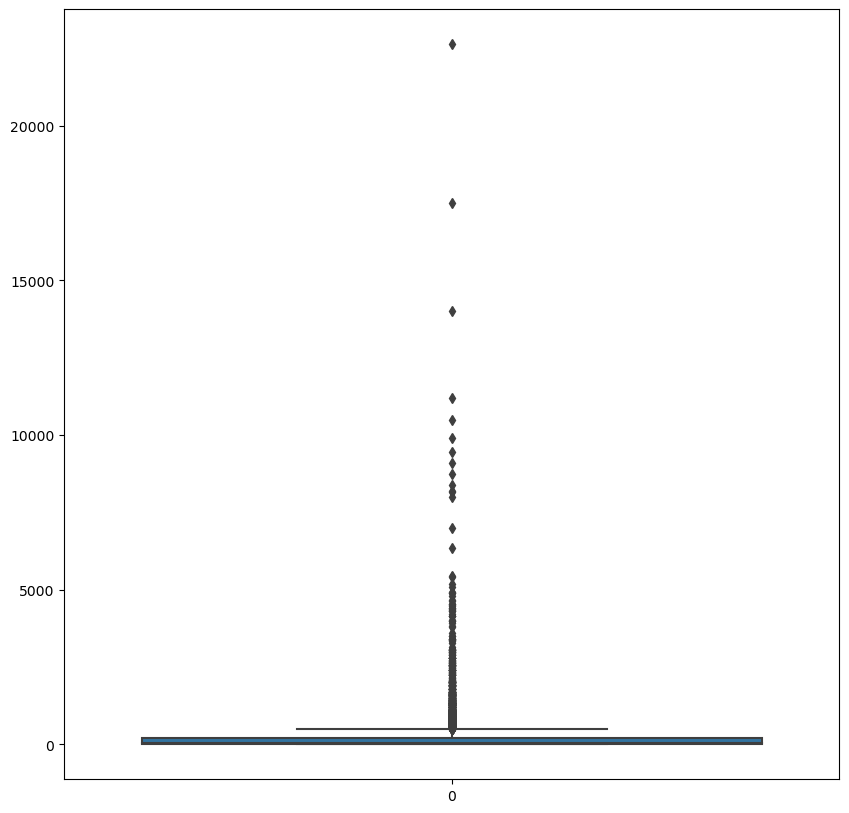

In [84]:
fig, axes = plt.subplots(figsize = (10 ,10))
sns.boxplot(df_orders['Sales'])

<Axes: >

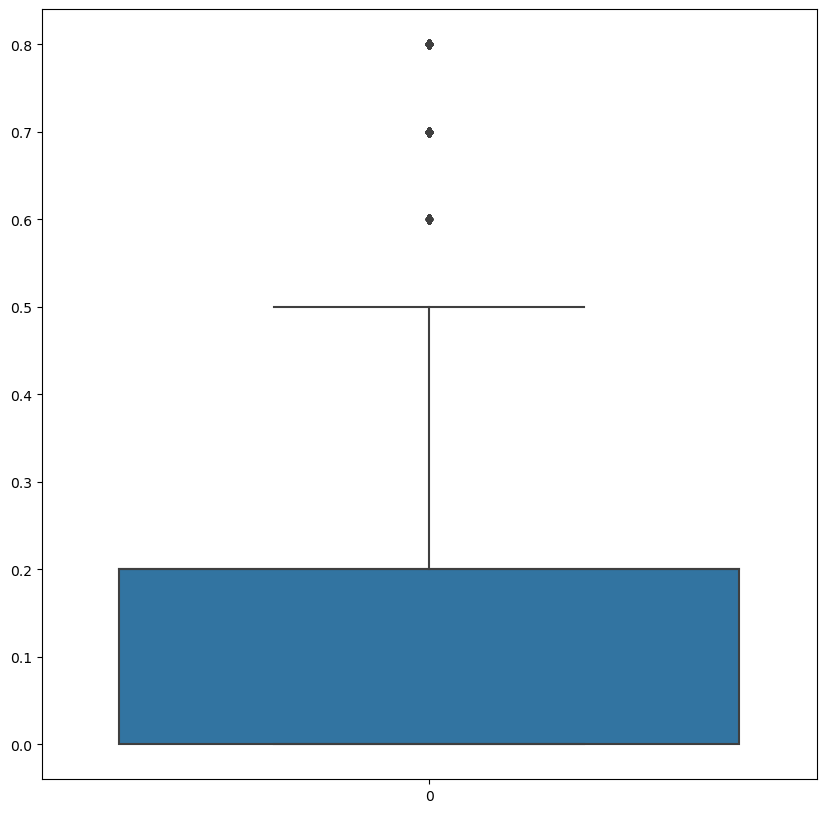

In [85]:
fig, axes = plt.subplots(figsize = (10,10))
sns.boxplot(df_orders['Discount'])

<Axes: >

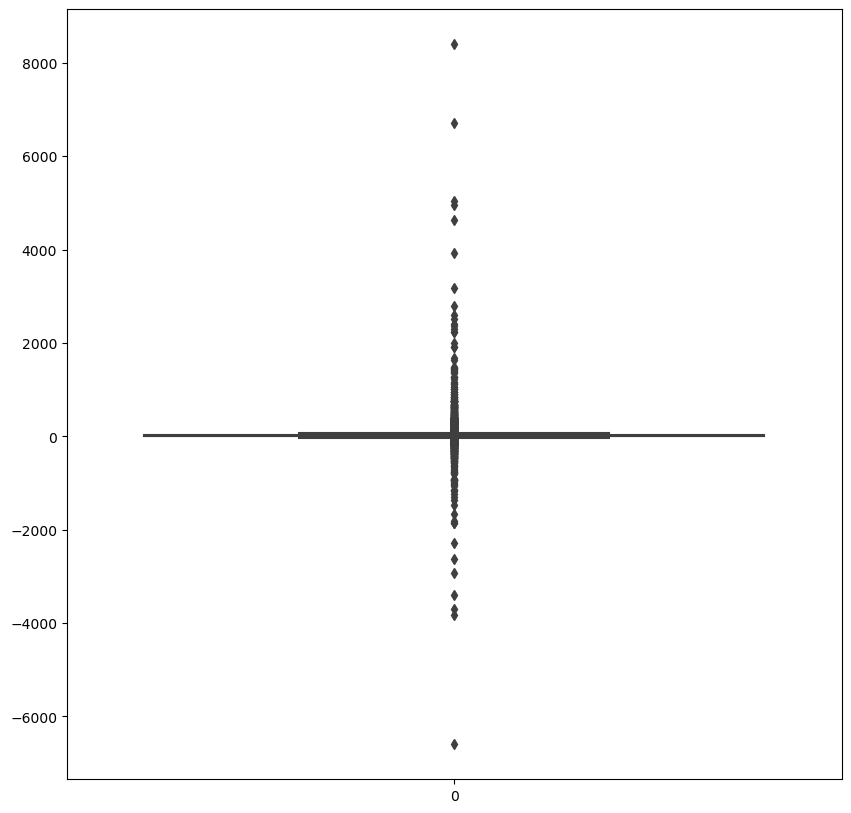

In [86]:
fig, axes = plt.subplots(figsize = (10, 10))
sns.boxplot(df_orders['Profit'])

In [90]:
Q1 = df_orders.quantile(q = 0.25, axis = 0,numeric_only = True, interpolation = 'linear')
Q3 = df_orders.quantile(q = 0.75, axis = 0,numeric_only = True, interpolation = 'linear')

In [91]:
IQR = Q3 - Q1
print(IQR)

Sales       192.66000
Quantity      3.00000
Discount      0.20000
Profit       27.63525
dtype: float64


<Axes: xlabel='Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit'>

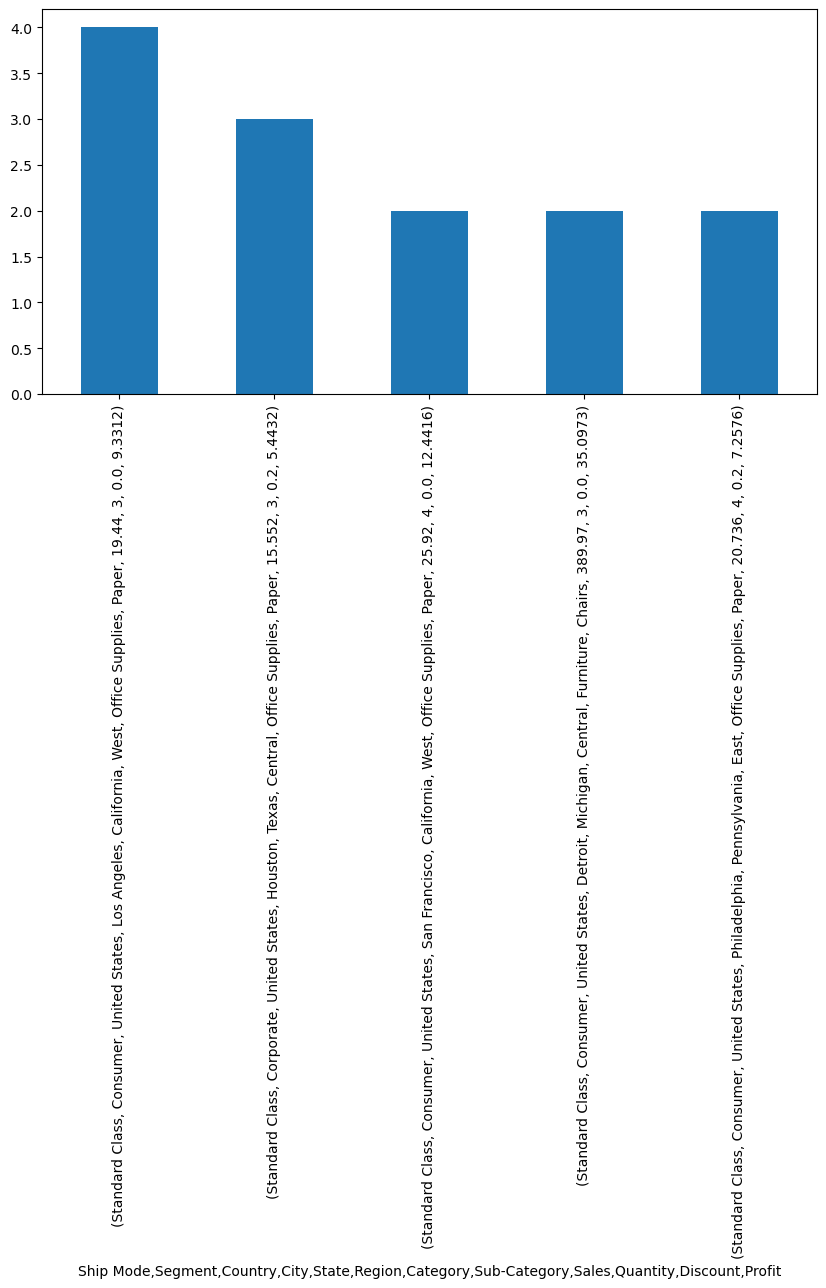

In [92]:
df_orders.value_counts().nlargest().plot(kind = 'bar' , figsize = (10, 5))

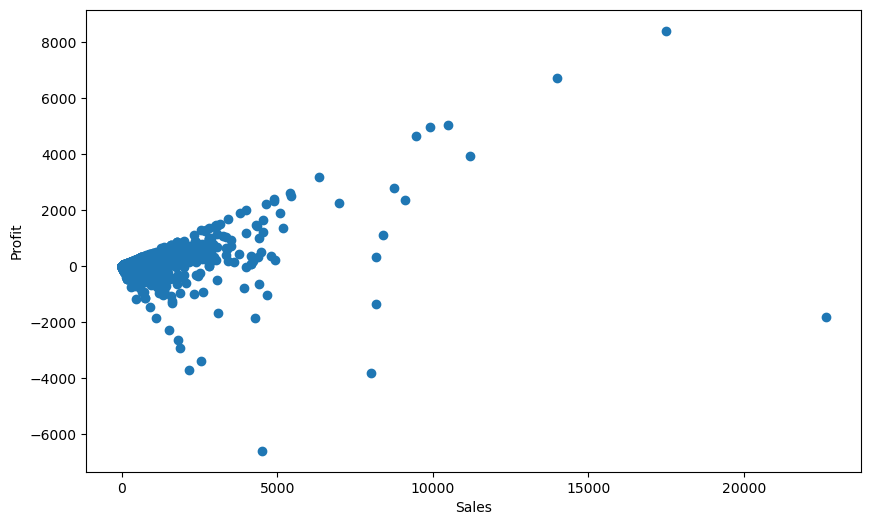

In [96]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.scatter(df_orders["Sales"], df_orders["Profit"])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
plt.show()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64


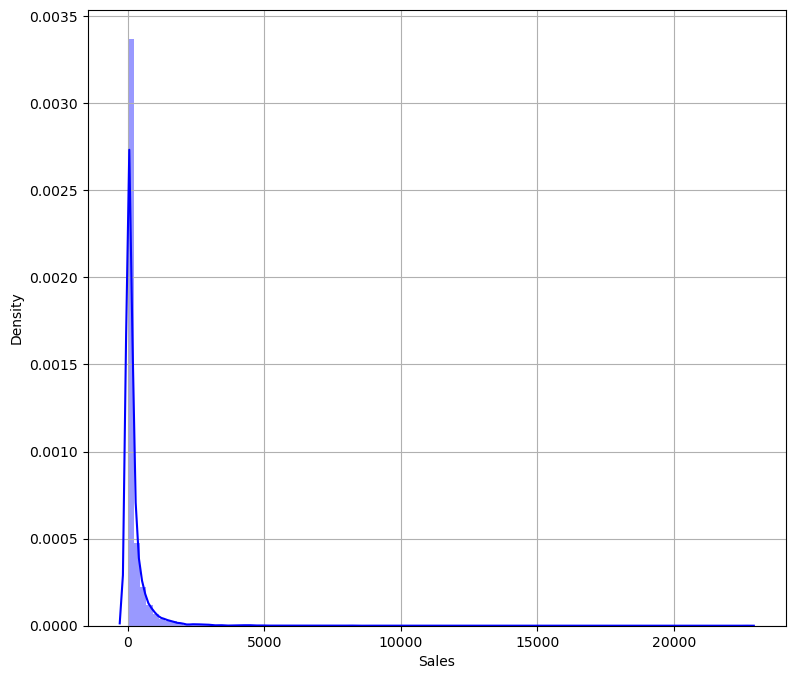

In [97]:
print(df_orders['Sales'].describe())
plt.figure(figsize = (9 ,8))
plt.grid()
sns.distplot(df_orders['Sales'], color = 'b', bins = 100, hist_kws = {'alpha': 0.4});

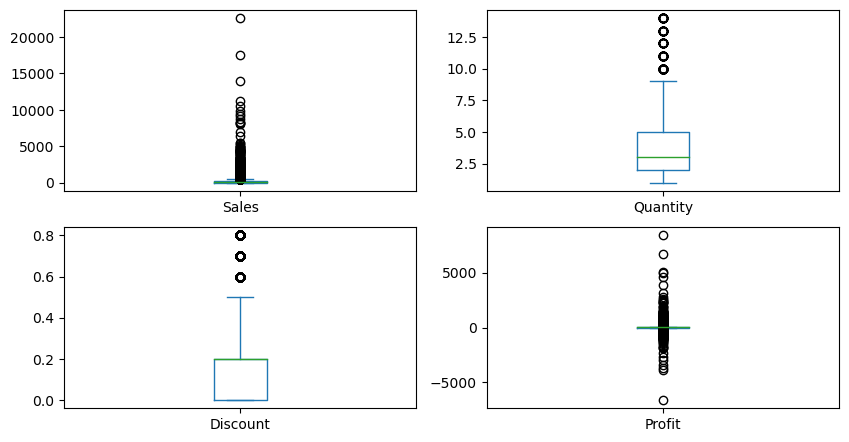

In [98]:
df_orders.plot(kind='box' , subplots=True, layout=(3,2), sharex=False, sharey= False)
plt.rcParams['figure.figsize'] = [14,12]
plt.show()

# Clustering of data

In [108]:
x = df_orders.iloc[:, [9, 10, 11, 12]].values
from sklearn.cluster import kMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                   max_iter = 300, n_init = 10, random_state = 0).fit(x)
    wcss.append(kmeans.inertia_)
sns.set_style("whitegrid")
sns.Facetgrid(df_orders, hue ="Sub-Category", height = 6).map(plt.scatter, 'Sales', 'Quantity')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           s = 100, c = 'yellow', label = 'Centroids')
plt.rcParams['figure.figsize'] = [10,8]
plt.legend()


IndexError: positional indexers are out-of-bounds

# Conclusion

1) Profit in south & central is less
2) Profit in east & west regions is better than south and central
3) Highest profit is earned in Copiers while selling price for chairs and phones is extremely high compared to other products.
4) Another interesting fact- people dont prefer to buy Tables and Bookcases from superstore. Hence these departments are in loss.
5) The store has wide variety of office supplies especially in binders and paper department.
6) Negative correlation between profit and discount
7) Total sum of profit in sale of tables is negative
8) Profit is more in sale of copiers.
9) No or very less profit in sale of supplies
10) Technology segment is more profitable